#**Mental Health Screening for Students**

##**Importing Necessary Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.utils.class_weight import compute_sample_weight
from scipy.stats import randint, uniform
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import pickle

## **Loading the Dataset**

In [3]:
file_path="/content/drive/MyDrive/Response_file.csv"

In [4]:
df=pd.read_csv(file_path)

In [5]:
df.shape

(2212, 33)

In [6]:
df.head()

,Timestamp,Age,Gender,CGPA,Sleep_Quality,Physical_Activity,Diet_Quality,Chronic_Illness,Extracurricular_Involvement,Financial_Stress,...,I felt that life was meaningless,I was aware of dryness of my mouth,"I experienced breathing difficulty (e.g. excessively rapid breathing, breathlessness in the absence of physical exertion)",I experienced trembling (e.g. in the hands),I was worried about situations in which I might panic and make a fool of myself,I felt I was close to panic,"I was aware of the action of my heart in the absence of physical exertion (e.g. sense of heart rate increase, heart missing a beat)",I felt scared without any good reason,Column 31,Column 31.1
0,08/01/2025 04:27,21,Male,8.80,Good (7+ hours/day),"Low: Minimal or no physical activity (e.g., mo...","Average: A mix of healthy and unhealthy foods,...",No,High: Frequently and actively involved,0,...,1,0,3,1,0,1,1,3,NaN,NaN
1,08/01/2025 07:30,26,Female,7.98,Average (5-7 hours/day),"Low: Minimal or no physical activity (e.g., mo...","Average: A mix of healthy and unhealthy foods,...",Yes,High: Frequently and actively involved,4,...,2,0,3,2,0,1,1,2,NaN,NaN
2,08/01/2025 09:09,21,Male,7.36,Poor (< 5 hours / day),"Moderate: Some physical activity (e.g., walkin...","Poor: Mostly unhealthy or processed foods, irr...",Yes,Moderate: Occasionally participate,1,...,0,1,1,2,0,0,2,2,NaN,NaN
3,08/01/2025 09:14,19,Male,7.06,Good (7+ hours/day),"Moderate: Some physical activity (e.g., walkin...","Poor: Mostly unhealthy or processed foods, irr...",No,Low: Rarely or never participate,0,...,1,0,3,3,2,0,1,1,NaN,NaN
4,08/01/2025 12:37,20,Female,6.74,Average (5-7 hours/day),"Moderate: Some physical activity (e.g., walkin...","Poor: Mostly unhealthy or processed foods, irr...",Yes,Low: Rarely or never participate,1,...,2,0,1,1,0,2,0,0,NaN,NaN


## **Data Preprocessing & Exploratory Data Analysis**

### **Renaming the columns**

In [7]:
stress_columns = [
    "I found it hard to wind down",
    "I tended to over-react to situations",
    "I felt that I was using a lot of nervous energy",
    "I found myself getting agitated",
    "I found it difficult to relax",
    "I was intolerant of anything that kept me from getting on with what I was doing",
    "I felt that I was rather touchy"
]

depression_columns = [
    "I couldn’t seem to experience any positive feeling at all",
    "I found it difficult to work up the initiative to do things",
    "I felt that I had nothing to look forward to",
    "I felt down hearted and blue",
    "I was unable to become enthusiastic about anything",
    "I felt I wasn’t worth much as a person",
    "I felt that life was meaningless"
]

anxiety_columns = [
    "I was aware of dryness of my mouth",
    "I experienced breathing difficulty (e.g. excessively rapid breathing, breathlessness in the absence of physical exertion)",
    "I experienced trembling (e.g. in the hands)",
    "I was worried about situations in which I might panic and make a fool of myself",
    "I felt I was close to panic",
    "I was aware of the action of my heart in the absence of physical exertion (e.g. sense of heart rate increase, heart missing a beat)",
    "I felt scared without any good reason"
]

In [8]:
stress_rename = {col: f'stress_column{i+1}' for i, col in enumerate(stress_columns)}
depression_rename = {col: f'depression_column{i+1}' for i, col in enumerate(depression_columns)}
anxiety_rename = {col: f'anxiety_column{i+1}' for i, col in enumerate(anxiety_columns)}

# Rename columns in the dataframe
df.rename(columns={**stress_rename, **depression_rename, **anxiety_rename}, inplace=True)

In [9]:
df.head()

,Timestamp,Age,Gender,CGPA,Sleep_Quality,Physical_Activity,Diet_Quality,Chronic_Illness,Extracurricular_Involvement,Financial_Stress,...,depression_column7,anxiety_column1,anxiety_column2,anxiety_column3,anxiety_column4,anxiety_column5,anxiety_column6,anxiety_column7,Column 31,Column 31.1
0,08/01/2025 04:27,21,Male,8.80,Good (7+ hours/day),"Low: Minimal or no physical activity (e.g., mo...","Average: A mix of healthy and unhealthy foods,...",No,High: Frequently and actively involved,0,...,1,0,3,1,0,1,1,3,NaN,NaN
1,08/01/2025 07:30,26,Female,7.98,Average (5-7 hours/day),"Low: Minimal or no physical activity (e.g., mo...","Average: A mix of healthy and unhealthy foods,...",Yes,High: Frequently and actively involved,4,...,2,0,3,2,0,1,1,2,NaN,NaN
2,08/01/2025 09:09,21,Male,7.36,Poor (< 5 hours / day),"Moderate: Some physical activity (e.g., walkin...","Poor: Mostly unhealthy or processed foods, irr...",Yes,Moderate: Occasionally participate,1,...,0,1,1,2,0,0,2,2,NaN,NaN
3,08/01/2025 09:14,19,Male,7.06,Good (7+ hours/day),"Moderate: Some physical activity (e.g., walkin...","Poor: Mostly unhealthy or processed foods, irr...",No,Low: Rarely or never participate,0,...,1,0,3,3,2,0,1,1,NaN,NaN
4,08/01/2025 12:37,20,Female,6.74,Average (5-7 hours/day),"Moderate: Some physical activity (e.g., walkin...","Poor: Mostly unhealthy or processed foods, irr...",Yes,Low: Rarely or never participate,1,...,2,0,1,1,0,2,0,0,NaN,NaN


### **Dropping Unnecessary Columns**

In [10]:
df.drop(['Timestamp','Column 31','Column 31.1'], axis=1, inplace=True)

In [11]:
df.shape

(2212, 30)

### **Handling Missing Values**

In [12]:
df.isnull().sum()

,0
Age,0
Gender,0
CGPA,64
Sleep_Quality,0
Physical_Activity,0
Diet_Quality,0
Chronic_Illness,0
Extracurricular_Involvement,0
Financial_Stress,0
stress_column1,0


####**Understanding the Data Distribution of CGPA field**

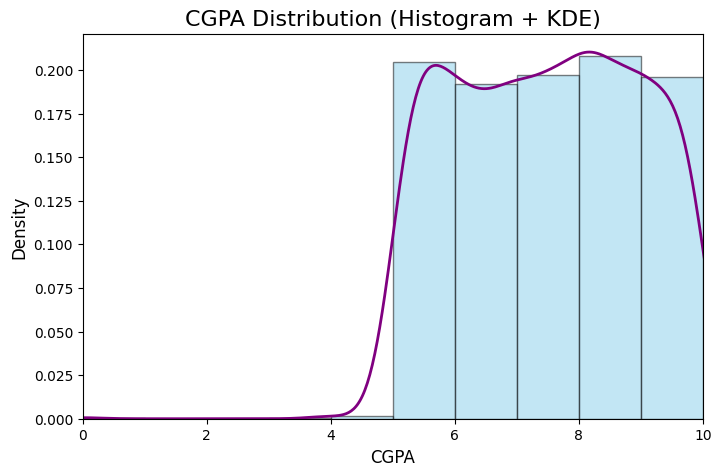

In [13]:
plt.figure(figsize=(8, 5))
df['CGPA'].plot(kind='kde', color='purple', linewidth=2)
plt.hist(df['CGPA'], bins=10, color='skyblue', edgecolor='black', alpha=0.5, density=True)

plt.xlim(0, 10)

plt.title('CGPA Distribution (Histogram + KDE)', fontsize=16)
plt.xlabel('CGPA', fontsize=12)
plt.ylabel('Density', fontsize=12)

plt.show()

In [14]:
df['CGPA'].fillna(df['CGPA'].median(), inplace=True) #since CGPA is right-skewed

In [15]:
df.isnull().sum().sum()

np.int64(0)

### **Checking for duplicates**

In [16]:
df.duplicated().sum()

np.int64(0)

### **Summary Statistics**

####**Quantitative Features**

In [17]:
df[['Age', 'CGPA']].describe()

,Age,CGPA
count,2212.000000,2212.000000
mean,23.282550,7.481078
std,3.408586,1.436976
min,18.000000,0.000000
25%,20.000000,6.240000
50%,23.000000,7.510000
75%,26.000000,8.680000
max,29.000000,10.000000


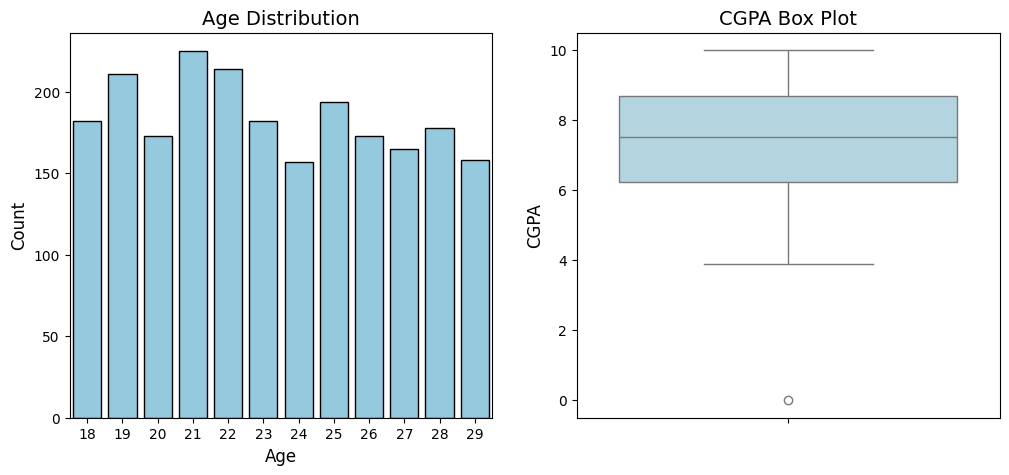

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Count Plot for Age
plt.subplot(1, 2, 1)
sns.countplot(x='Age', data=df, color='skyblue', edgecolor='black')
plt.title('Age Distribution', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Box Plot for CGPA
plt.subplot(1, 2, 2)
sns.boxplot(y='CGPA', data=df, color='lightblue')
plt.title('CGPA Box Plot', fontsize=14)
plt.ylabel('CGPA', fontsize=12)

plt.show()

####**Qualitative Features**

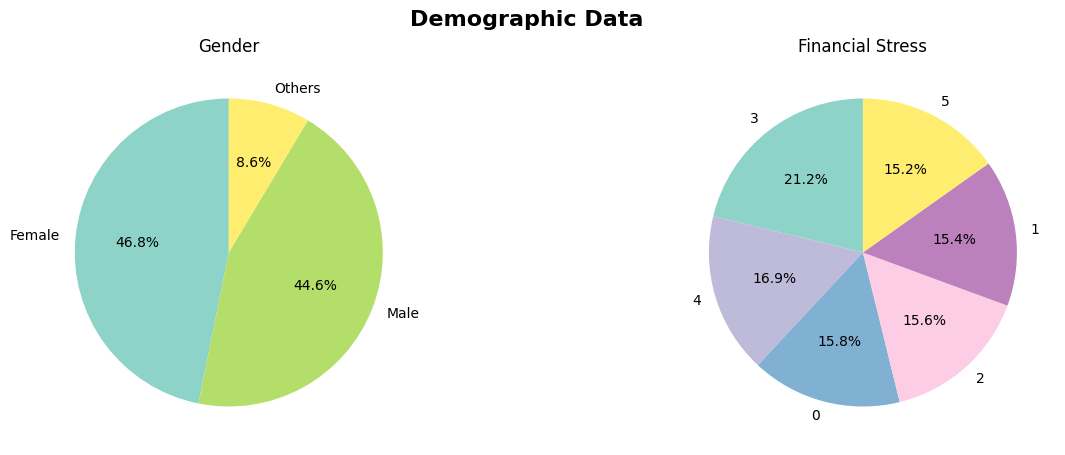

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle('Demographic Data', fontsize=16, weight='bold')

# Gender
df['Gender'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    cmap='Set3',
    ax=axes[0]
)
axes[0].set_title('Gender')
axes[0].set_ylabel(None)

# Financial Stress
df['Financial_Stress'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    cmap='Set3',
    ax=axes[1]
)
axes[1].set_title('Financial Stress')
axes[1].set_ylabel(None)
plt.show()

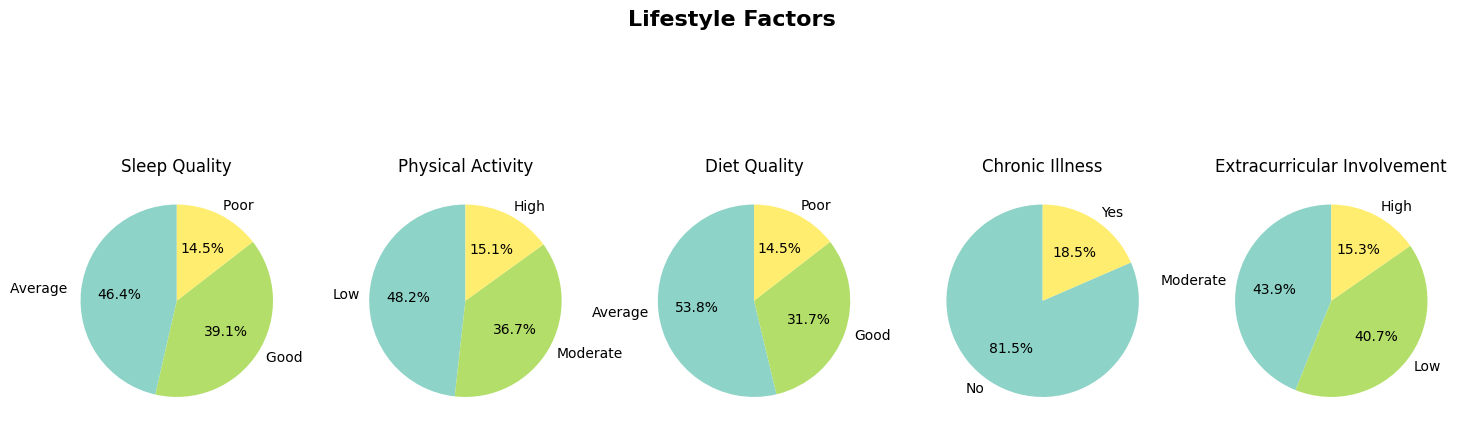

In [20]:
fig, axes = plt.subplots(1, 5, figsize=(18, 6))

fig.suptitle('Lifestyle Factors', fontsize=16, weight='bold')

# Extract labels before the colon or parenthesis
sleep_labels = [label.split('(')[0] for label in df['Sleep_Quality'].value_counts().index]
physical_activity_labels = [label.split(':')[0] for label in df['Physical_Activity'].value_counts().index]
diet_labels = [label.split(':')[0] for label in df['Diet_Quality'].value_counts().index]
chronic_labels = df['Chronic_Illness'].value_counts().index.tolist()
extracurricular_labels=[label.split(':')[0] for label in df['Extracurricular_Involvement'].value_counts().index]

# Sleep Quality
df['Sleep_Quality'].value_counts().plot(kind='pie',labels=sleep_labels,autopct='%1.1f%%',startangle=90,cmap='Set3',ax=axes[0])

axes[0].set_title('Sleep Quality')
axes[0].set_ylabel('')

# Physical Activity
df['Physical_Activity'].value_counts().plot(kind='pie',labels=physical_activity_labels,autopct='%1.1f%%',startangle=90,cmap='Set3',ax=axes[1])

axes[1].set_title('Physical Activity')
axes[1].set_ylabel('')

# Diet Quality
df['Diet_Quality'].value_counts().plot(kind='pie',labels=diet_labels,autopct='%1.1f%%',startangle=90,cmap='Set3',ax=axes[2])

axes[2].set_title('Diet Quality')
axes[2].set_ylabel('')

# Chronic Illness
df['Chronic_Illness'].value_counts().plot(kind='pie',labels=chronic_labels,autopct='%1.1f%%',startangle=90,cmap='Set3',ax=axes[3])

axes[3].set_title('Chronic Illness')
axes[3].set_ylabel('')

# Extracurricular Involvement
df['Extracurricular_Involvement'].value_counts().plot(kind='pie',labels=extracurricular_labels,autopct='%1.1f%%',startangle=90,cmap='Set3',ax=axes[4])

axes[4].set_title('Extracurricular Involvement')
axes[4].set_ylabel('')

plt.show()

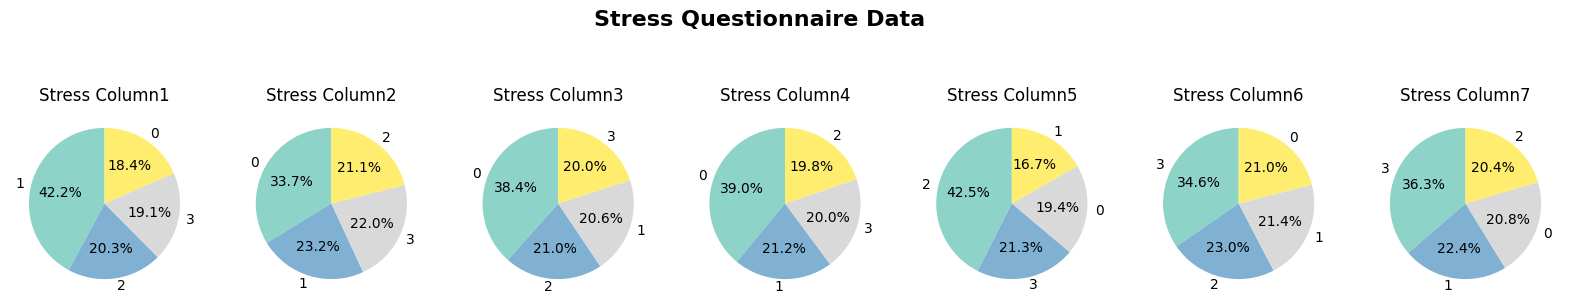

In [21]:
fig, axes = plt.subplots(1, 7, figsize=(20, 4))

fig.suptitle('Stress Questionnaire Data', fontsize=16, weight='bold')

# Stress columns
stress_columns = [
    'stress_column1', 'stress_column2', 'stress_column3',
    'stress_column4', 'stress_column5', 'stress_column6', 'stress_column7'
]

for i, col in enumerate(stress_columns):
    df[col].value_counts().plot(
        kind='pie',
        autopct='%1.1f%%',
        startangle=90,
        cmap='Set3',
        ax=axes[i]
    )
    axes[i].set_title(col.replace('_', ' ').title())
    axes[i].set_ylabel('')

plt.show()

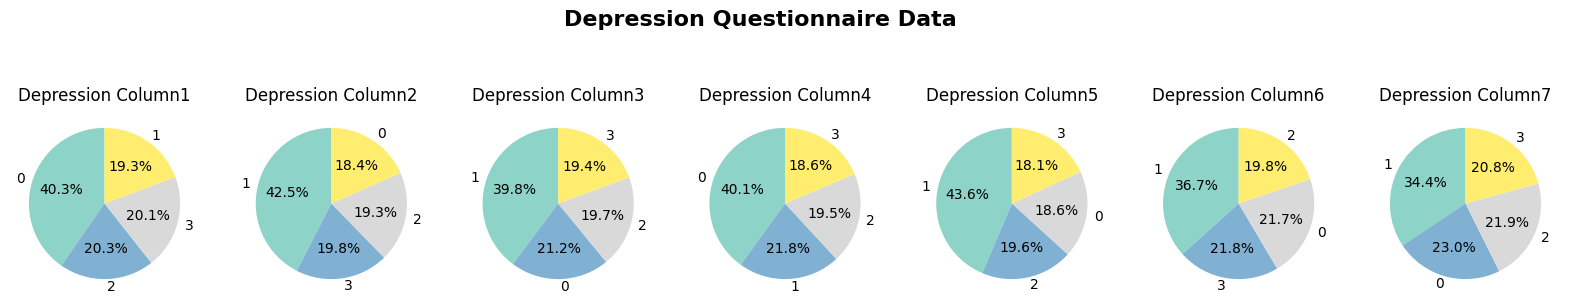

In [22]:
fig, axes = plt.subplots(1, 7, figsize=(20, 4))

fig.suptitle('Depression Questionnaire Data', fontsize=16, weight='bold')

# Depression columns
depression_columns = [
    'depression_column1', 'depression_column2', 'depression_column3',
    'depression_column4', 'depression_column5', 'depression_column6', 'depression_column7'
]

for i, col in enumerate(depression_columns):
    df[col].value_counts().plot(
        kind='pie',
        autopct='%1.1f%%',
        startangle=90,
        cmap='Set3',
        ax=axes[i]
    )
    axes[i].set_title(col.replace('_', ' ').title())
    axes[i].set_ylabel('')

plt.show()

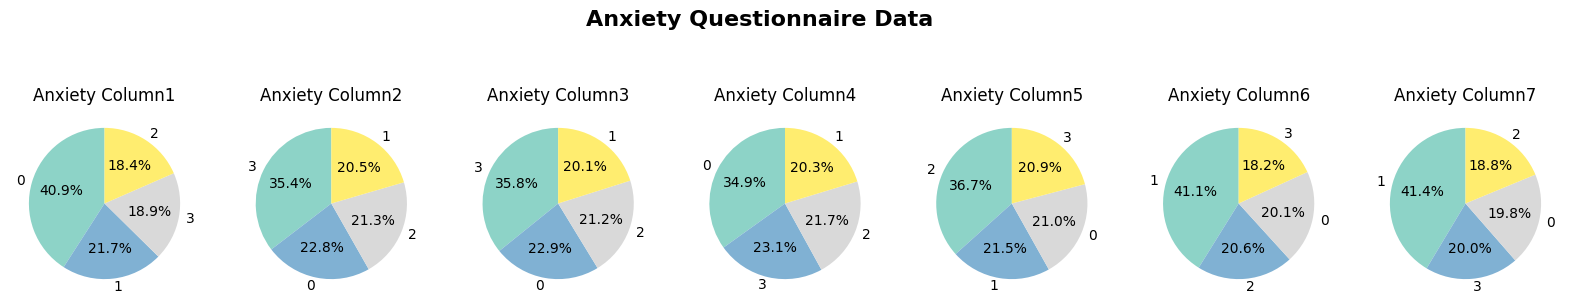

In [23]:
fig, axes = plt.subplots(1, 7, figsize=(20, 4))

fig.suptitle('Anxiety Questionnaire Data', fontsize=16, weight='bold')

# Anxiety columns
anxiety_columns = [
    'anxiety_column1', 'anxiety_column2', 'anxiety_column3',
    'anxiety_column4', 'anxiety_column5', 'anxiety_column6', 'anxiety_column7'
]

for i, col in enumerate(anxiety_columns):
    df[col].value_counts().plot(
        kind='pie',
        autopct='%1.1f%%',
        startangle=90,
        cmap='Set3',
        ax=axes[i]
    )
    axes[i].set_title(col.replace('_', ' ').title())
    axes[i].set_ylabel('')

plt.show()

### **Data Encoding**

In [24]:
mappings = {
    'Sleep_Quality': {'Good (7+ hours/day)': 2, 'Average (5-7 hours/day)': 1, 'Poor (< 5 hours / day)': 0},
    'Diet_Quality': {'Good: Consistently healthy, balanced meals with adequate nutrients': 2, 'Average: A mix of healthy and unhealthy foods, somewhat balanced but not consistent': 1, 'Poor: Mostly unhealthy or processed foods, irregular meals, or lack of balanced nutrition': 0},
    'Physical_Activity': {'High: Regular intense physical activity (e.g., gym workouts, sports, running, or daily exercise routines)': 2, 'Moderate: Some physical activity (e.g., walking, light exercises, or occasional workouts)': 1, 'Low: Minimal or no physical activity (e.g., mostly sedentary, no regular exercise)': 0},
    'Extracurricular_Involvement': {'High: Frequently and actively involved': 2, 'Moderate: Occasionally participate': 1, 'Low: Rarely or never participate': 0},
    'Chronic_Illness': {'No': 0, 'Yes': 1},
    'Gender': {'Male': 1,'Others':2, 'Female': 0}
}

In [25]:
for col, mapping in mappings.items():
    if col in df.columns:
        df[col] = df[col].map(mapping)

In [26]:
df.head()

,Age,Gender,CGPA,Sleep_Quality,Physical_Activity,Diet_Quality,Chronic_Illness,Extracurricular_Involvement,Financial_Stress,stress_column1,...,depression_column5,depression_column6,depression_column7,anxiety_column1,anxiety_column2,anxiety_column3,anxiety_column4,anxiety_column5,anxiety_column6,anxiety_column7
0,21,1,8.80,2,0,1,0,2,0,2,...,1,0,1,0,3,1,0,1,1,3
1,26,0,7.98,1,0,1,1,2,4,2,...,1,2,2,0,3,2,0,1,1,2
2,21,1,7.36,0,1,0,1,1,1,3,...,2,3,0,1,1,2,0,0,2,2
3,19,1,7.06,2,1,0,0,0,0,1,...,1,1,1,0,3,3,2,0,1,1
4,20,0,6.74,1,1,0,1,0,1,0,...,3,0,2,0,1,1,0,2,0,0


### **Normalizing Quantitative Features(Age & CGPA)**

In [27]:
scaler = MinMaxScaler()
df[['Age', 'CGPA']] = scaler.fit_transform(df[['Age', 'CGPA']])

In [28]:
df.head()

,Age,Gender,CGPA,Sleep_Quality,Physical_Activity,Diet_Quality,Chronic_Illness,Extracurricular_Involvement,Financial_Stress,stress_column1,...,depression_column5,depression_column6,depression_column7,anxiety_column1,anxiety_column2,anxiety_column3,anxiety_column4,anxiety_column5,anxiety_column6,anxiety_column7
0,0.272727,1,0.880,2,0,1,0,2,0,2,...,1,0,1,0,3,1,0,1,1,3
1,0.727273,0,0.798,1,0,1,1,2,4,2,...,1,2,2,0,3,2,0,1,1,2
2,0.272727,1,0.736,0,1,0,1,1,1,3,...,2,3,0,1,1,2,0,0,2,2
3,0.090909,1,0.706,2,1,0,0,0,0,1,...,1,1,1,0,3,3,2,0,1,1
4,0.181818,0,0.674,1,1,0,1,0,1,0,...,3,0,2,0,1,1,0,2,0,0


### **Computing the Risk Levels**

In [29]:
def compute_risk_levels(df):
    stress_columns = [f'stress_column{i}' for i in range(1, 8)]
    depression_columns = [f'depression_column{i}' for i in range(1, 8)]
    anxiety_columns = [f'anxiety_column{i}' for i in range(1, 8)]

    df['Stress_Score'] = df[stress_columns].sum(axis=1)*2
    df['Depression_Score'] = df[depression_columns].sum(axis=1)*2
    df['Anxiety_Score'] = df[anxiety_columns].sum(axis=1)*2
    return df

In [30]:
df=compute_risk_levels(df)

In [31]:
df.shape

(2212, 33)

### **Assigning Labels to Stress, Depression and Anxiety in accordance to DASS-21 Framework**

In [32]:
def get_stress_label(score):
    if score <= 14:
        return 'Normal'
    elif score <= 18:
        return 'Mild'
    elif score <= 25:
        return 'Moderate'
    elif score <= 33:
        return 'Severe'
    else:
        return 'Extremely Severe'

def get_depression_label(score):
    if score <= 9:
        return 'Normal'
    elif score <= 13:
        return 'Mild'
    elif score <= 20:
        return 'Moderate'
    elif score <= 27:
        return 'Severe'
    else:
        return 'Extremely Severe'

def get_anxiety_label(score):
    if score <= 7:
        return 'Normal'
    elif score <= 9:
        return 'Mild'
    elif score <= 14:
        return 'Moderate'
    elif score <= 19:
        return 'Severe'
    else:
        return 'Extremely Severe'

def assign_dass_labels(df):
    # Apply corresponding label function to each column
    df['Stress_Label'] = df['Stress_Score'].apply(get_stress_label)
    df['Depression_Label'] = df['Depression_Score'].apply(get_depression_label)
    df['Anxiety_Label'] = df['Anxiety_Score'].apply(get_anxiety_label)

    return df

In [33]:
df=assign_dass_labels(df)

In [34]:
df.head()

,Age,Gender,CGPA,Sleep_Quality,Physical_Activity,Diet_Quality,Chronic_Illness,Extracurricular_Involvement,Financial_Stress,stress_column1,...,anxiety_column4,anxiety_column5,anxiety_column6,anxiety_column7,Stress_Score,Depression_Score,Anxiety_Score,Stress_Label,Depression_Label,Anxiety_Label
0,0.272727,1,0.880,2,0,1,0,2,0,2,...,0,1,1,3,22,20,18,Moderate,Moderate,Severe
1,0.727273,0,0.798,1,0,1,1,2,4,2,...,0,1,1,2,20,16,18,Moderate,Moderate,Severe
2,0.272727,1,0.736,0,1,0,1,1,1,3,...,0,0,2,2,8,14,16,Normal,Moderate,Severe
3,0.090909,1,0.706,2,1,0,0,0,0,1,...,2,0,1,1,24,22,20,Moderate,Severe,Extremely Severe
4,0.181818,0,0.674,1,1,0,1,0,1,0,...,0,2,0,0,0,22,8,Normal,Severe,Mild


In [35]:
df.shape

(2212, 36)

In [36]:
df['Stress_Label'].value_counts()

,count
Stress_Label,
Moderate,808
Mild,513
Severe,466
Normal,393
Extremely Severe,32


In [37]:
df[['Depression_Label']].value_counts()

,count
Depression_Label,
Moderate,1116
Severe,561
Mild,270
Extremely Severe,183
Normal,82


In [38]:
df['Anxiety_Label'].value_counts()

,count
Anxiety_Label,
Extremely Severe,1326
Severe,478
Moderate,362
Mild,30
Normal,16


### **Principal Component Analysis to reduce to a single target dimension**

In [39]:
# Step 1: Standardize the original features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Stress_Score', 'Depression_Score', 'Anxiety_Score']])

# Step 2: Apply PCA to get PC1
pca = PCA(n_components=1)
pc1 = pca.fit_transform(scaled_data)

# Step 3: Reverse the standardization on PCA1 to get it in the original scale
pc1_original_scale= (pc1 * np.mean(scaler.scale_)) + np.mean(scaler.mean_)

# Step 4: Round to integer values
df['PC1'] = pc1_original_scale.round().astype(int)

# Step 5: Print Explained_Variance_Ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

Explained Variance Ratio: [0.34401167]


In [40]:
df[['Stress_Score','Depression_Score','Anxiety_Score','PC1']].describe().round(2)

,Stress_Score,Depression_Score,Anxiety_Score,PC1
count,2212.00,2212.00,2212.00,2212.00
mean,20.49,18.68,20.42,19.85
std,5.87,5.77,5.73,5.90
min,0.00,2.00,4.00,2.00
25%,16.00,14.00,16.00,16.00
50%,20.00,18.00,20.00,20.00
75%,24.00,22.00,24.00,24.00
max,38.00,40.00,40.00,40.00


### **Visualizing the outcome of Principal Component Analysis**

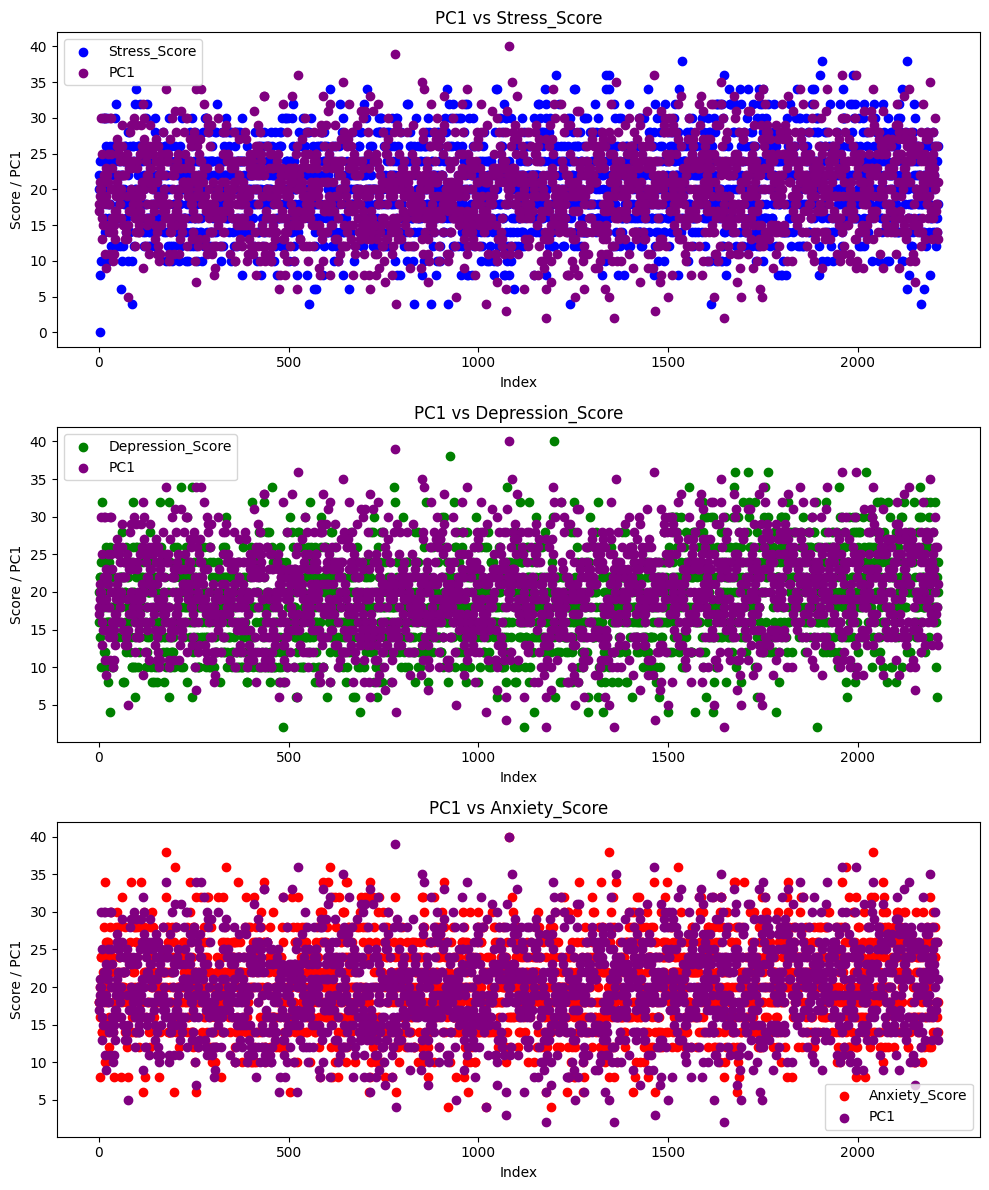

In [41]:
# Create a figure with 3 subplots (1 column, 3 rows)
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# Scatter plot for Stress_Score vs PC1 (X: Index, Y: Values)
axes[0].scatter(df.index, df['Stress_Score'], label='Stress_Score', color='blue')
axes[0].scatter(df.index, df['PC1'], label='PC1', color='purple')
axes[0].set_title('PC1 vs Stress_Score')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Score / PC1')
axes[0].legend()

# Scatter plot for Depression_Score vs PC1 (X: Index, Y: Values)
axes[1].scatter(df.index, df['Depression_Score'], label='Depression_Score', color='green')
axes[1].scatter(df.index, df['PC1'], label='PC1', color='purple')
axes[1].set_title('PC1 vs Depression_Score')
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Score / PC1')
axes[1].legend()

# Scatter plot for Anxiety_Score vs PC1 (X: Index, Y: Values)
axes[2].scatter(df.index, df['Anxiety_Score'], label='Anxiety_Score', color='red')
axes[2].scatter(df.index, df['PC1'], label='PC1', color='purple')
axes[2].set_title('PC1 vs Anxiety_Score')
axes[2].set_xlabel('Index')
axes[2].set_ylabel('Score / PC1')
axes[2].legend()

# Adjust layout to prevent overlapping labels
plt.tight_layout()

# Show the plot
plt.show()

In [42]:
def assign_risk_level(pc1_score):
    if pc1_score <= 10:
        return 'Normal'
    elif pc1_score <= 13:
        return 'Mild'
    elif pc1_score <= 20:
        return 'Moderate'
    elif pc1_score <= 26:
        return 'Severe'
    else:
        return 'Extremely Severe'

# Apply the function to the 'PC1' column in your DataFrame
df['PC1_Risk_Level'] = df['PC1'].apply(assign_risk_level)

In [43]:
df['PC1_Risk_Level'].value_counts()

,count
PC1_Risk_Level,
Moderate,885
Severe,718
Extremely Severe,291
Mild,197
Normal,121


## **Model Training**

In [44]:
df.keys()

Index(['Age', 'Gender', 'CGPA', 'Sleep_Quality', 'Physical_Activity',
       'Diet_Quality', 'Chronic_Illness', 'Extracurricular_Involvement',
       'Financial_Stress', 'stress_column1', 'stress_column2',
       'stress_column3', 'stress_column4', 'stress_column5', 'stress_column6',
       'stress_column7', 'depression_column1', 'depression_column2',
       'depression_column3', 'depression_column4', 'depression_column5',
       'depression_column6', 'depression_column7', 'anxiety_column1',
       'anxiety_column2', 'anxiety_column3', 'anxiety_column4',
       'anxiety_column5', 'anxiety_column6', 'anxiety_column7', 'Stress_Score',
       'Depression_Score', 'Anxiety_Score', 'Stress_Label', 'Depression_Label',
       'Anxiety_Label', 'PC1', 'PC1_Risk_Level'],
      dtype='object')

### **Feature Selection**

In [45]:
X = df.drop(['Stress_Score', 'Depression_Score', 'Anxiety_Score', 'Stress_Label',
             'Depression_Label', 'Anxiety_Label', 'PC1','PC1_Risk_Level'],axis=1)

y = df['PC1_Risk_Level']

### **Splitting the dataset**

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 1769
Test set size: 443


### **Initializing Stratified K-Folds**

In [47]:
stratified_kfold=StratifiedKFold(n_splits=6, shuffle=True, random_state=42)



### **Gaussian Naive Bayes Classification**

#### **Setting up the Naive Baye's Hyperparameter Grid**

In [57]:
gnb_param_grid = {
    'var_smoothing': np.concatenate([
        np.logspace(-12, -9, num=3),  # Very small values => High sensitivity
        np.logspace(-9, -6, num=3),   # Moderate values => Balance
        np.logspace(-6, -3, num=3),   # Larger values => More smoothing
        [5e-2, 1e-1, 5e-1]            # A few extreme values to test boundaries
    ])
}

#### **Training the Naive Baye's Classifier with Stratified K-Fold Cross Validation**

In [58]:
gnb_model=GaussianNB()
grid_search_gnb = GridSearchCV(estimator=gnb_model, param_grid=gnb_param_grid, cv=stratified_kfold, scoring='accuracy', n_jobs=-1)
grid_search_gnb.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=6, random_state=42, shuffle=True),
             estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e-12, 3.16227766e-11, 1.00000000e-09, 1.00000000e-09,
       3.16227766e-08, 1.00000000e-06, 1.00000000e-06, 3.16227766e-05,
       1.00000000e-03, 5.00000000e-02, 1.00000000e-01, 5.00000000e-01])},
             scoring='accuracy')

#### **Results of performing Cross Validation**

In [59]:
print("Best Parameter:", grid_search_gnb.best_params_)
print(f"Cross-Validation Accuracy: {grid_search_gnb.best_score_ * 100:.2f}%")

Best Parameter: {'var_smoothing': np.float64(0.05)}
Cross-Validation Accuracy: 65.80%


#### **Performing Prediction on unseen test data and displaying evaluation metrics**

Classification Accuracy: 69.75%

Classification Report:
                  precision    recall  f1-score   support

          Normal       0.88      0.30      0.45        23
            Mild       0.33      0.08      0.13        37
        Moderate       0.70      0.96      0.81       185
          Severe       0.69      0.75      0.72       142
Extremely Severe       0.88      0.25      0.39        56

        accuracy                           0.70       443
       macro avg       0.69      0.47      0.50       443
    weighted avg       0.70      0.70      0.65       443



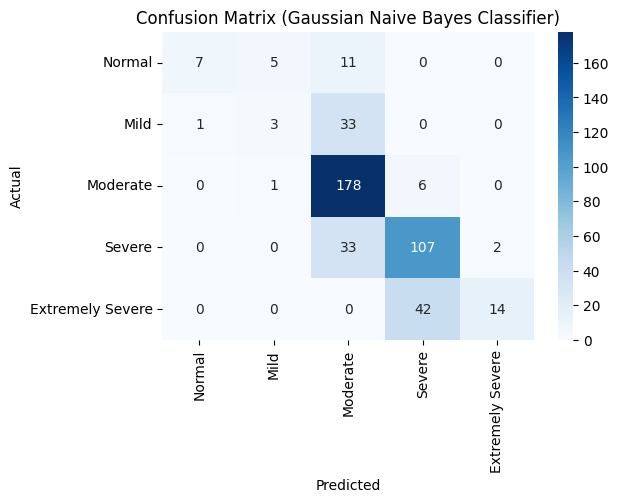

In [60]:
# Define the correct class order
class_order = ["Normal", "Mild", "Moderate", "Severe", "Extremely Severe"]

# Predict on the test set
y_pred = grid_search_gnb.predict(X_test)

# Print Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification Accuracy: {accuracy*100:.2f}%")

# Print Classification Report with correct class order
print("\nClassification Report:")
print(classification_report(y_test, y_pred, labels=class_order))

# Compute Confusion Matrix with correct class order
cm = confusion_matrix(y_test, y_pred, labels=class_order)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_order, yticklabels=class_order)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Gaussian Naive Bayes Classifier)")
plt.show()

### **Decision Tree**

#### **Setting up the Decision Tree Hyperparameter Grid**

In [61]:
dt_param_grid = {
    'max_depth': [5, 10, 15],  # Reduce depth to prevent overfitting
    'min_samples_split': [2, 5, 10],  # Allow earlier splits
    'min_samples_leaf': [1, 2, 5],  # Prevent excessive constraints
    'criterion': ['gini', 'entropy'],  # Test both
    'max_features': [None],  # Allow full feature usage
}

#### **Training the Decision Tree Classifier with Stratified K-Fold Cross Validation**

In [62]:
dt_model = DecisionTreeClassifier(class_weight='balanced')
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=dt_param_grid, cv=stratified_kfold, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search_dt.fit(X_train, y_train)

Fitting 6 folds for each of 54 candidates, totalling 324 fits


GridSearchCV(cv=StratifiedKFold(n_splits=6, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15], 'max_features': [None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=2)

#### **Results of performing Cross Validation**

In [63]:
print("Best Parameter:", grid_search_dt.best_params_)
print(f"Cross-Validation Accuracy: {grid_search_dt.best_score_ * 100:.2f}%")

Best Parameter: {'criterion': 'gini', 'max_depth': 15, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Cross-Validation Accuracy: 41.43%


#### **Performing Prediction on unseen test data and displaying evaluation metrics**

Classification Accuracy: 44.70%

Classification Report:
                  precision    recall  f1-score   support

          Normal       0.13      0.17      0.15        23
            Mild       0.33      0.43      0.37        37
        Moderate       0.53      0.50      0.52       185
          Severe       0.47      0.45      0.46       142
Extremely Severe       0.40      0.38      0.39        56

        accuracy                           0.45       443
       macro avg       0.37      0.39      0.38       443
    weighted avg       0.46      0.45      0.45       443



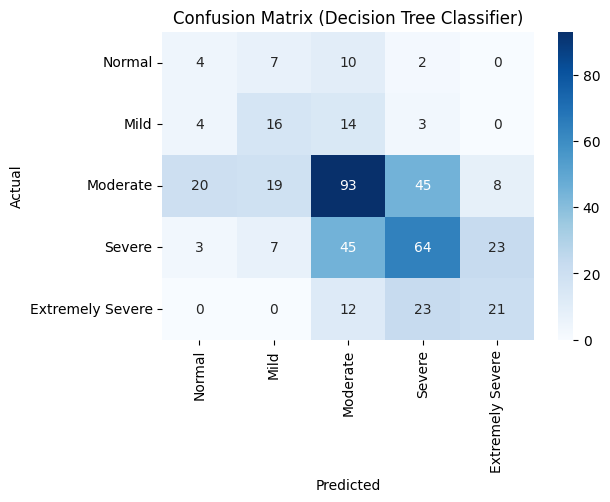

In [64]:
# Define the correct class order
class_order = ["Normal", "Mild", "Moderate", "Severe", "Extremely Severe"]

# Predict on the test set
y_pred = grid_search_dt.predict(X_test)

# Print Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification Accuracy: {accuracy*100:.2f}%")

# Print Classification Report with correct class order
print("\nClassification Report:")
print(classification_report(y_test, y_pred, labels=class_order, zero_division=0))

# Compute Confusion Matrix with correct class order
cm = confusion_matrix(y_test, y_pred, labels=class_order)

# Visualize Confusion Matrix using Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_order, yticklabels=class_order)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Decision Tree Classifier)")
plt.show()

### **Random Forest Classifier**

#### **Setting up the Random Forest Hyperparameter Grid**

In [65]:
rf_param_grid = {
    'n_estimators': [600, 800, 1000, 1200],
    'max_depth': [30, 40, None],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

#### **Training the Random Forest Classifier with Stratified K-Fold Cross Validation**

In [66]:
rf_model = RandomForestClassifier(class_weight='balanced')
grid_search_rf = GridSearchCV(estimator=rf_model,param_grid=rf_param_grid,cv=stratified_kfold,n_jobs=-1,verbose=2)
grid_search_rf.fit(X_train, y_train)

Fitting 6 folds for each of 288 candidates, totalling 1728 fits


GridSearchCV(cv=StratifiedKFold(n_splits=6, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [30, 40, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [600, 800, 1000, 1200]},
             verbose=2)

#### **Results of performing Cross Validation**

In [67]:
print("Best Parameter:", grid_search_rf.best_params_)
print(f"Cross-Validation Accuracy: {grid_search_rf.best_score_ * 100:.2f}%")

Best Parameter: {'bootstrap': True, 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 1200}
Cross-Validation Accuracy: 62.07%


#### **Performing Prediction on unseen test data and displaying evaluation metrics**

Classification Accuracy: 65.24%

Classification Report:
                  precision    recall  f1-score   support

          Normal       0.86      0.26      0.40        23
            Mild       0.14      0.03      0.05        37
        Moderate       0.66      0.88      0.75       185
          Severe       0.64      0.71      0.67       142
Extremely Severe       0.76      0.34      0.47        56

        accuracy                           0.65       443
       macro avg       0.61      0.44      0.47       443
    weighted avg       0.63      0.65      0.61       443



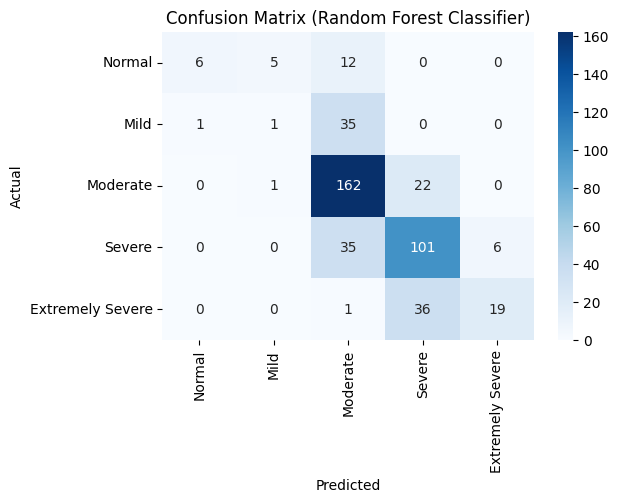

In [68]:
# Define the correct class order
class_order = ["Normal", "Mild", "Moderate", "Severe", "Extremely Severe"]

# Predict on the test set
y_pred = grid_search_rf.predict(X_test)

# Print Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification Accuracy: {accuracy*100:.2f}%")

# Print Classification Report with correct class order
print("\nClassification Report:")
print(classification_report(y_test, y_pred, labels=class_order, zero_division=0))

# Compute Confusion Matrix with correct class order
cm = confusion_matrix(y_test, y_pred, labels=class_order)

# Visualize Confusion Matrix using Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_order, yticklabels=class_order)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Random Forest Classifier)")
plt.show()

### **Gradient Booster Classifier**

#### **Setting up the Gradient Booster Hyperparameter Grid**

In [69]:
gb_param_dist = {
    'n_estimators': randint(600, 1000),  # Wider range for better exploration
    'learning_rate': uniform(0.03, 0.1),  # Increase upper limit
    'max_depth': randint(4, 12),  # Include shallower trees for generalization
    'min_samples_split': randint(2, 15),
    'min_samples_leaf': randint(1, 8),
    'subsample': uniform(0.6, 0.4),  # Ensures values up to 1.0
    'max_features': ['sqrt', 'log2']
}

#### **Training the Gradient Booster Classifier with Stratified K-Fold Cross Validation**

In [70]:
gbc_model = GradientBoostingClassifier()
# Perform Randomized Search
random_search_gb = RandomizedSearchCV(
    estimator=gbc_model,
    param_distributions=gb_param_dist,
    n_iter=50,  # More iterations for deeper search
    cv=stratified_kfold,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,
    random_state=42
)
sample_weights=compute_sample_weight(class_weight="balanced", y=y_train)
random_search_gb.fit(X_train, y_train, sample_weight=sample_weights)

Fitting 6 folds for each of 50 candidates, totalling 300 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=6, random_state=42, shuffle=True),
                   estimator=GradientBoostingClassifier(), n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7bb1143373d0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bb1142fa790>,
                                        'max_fe...
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bb1143fb9d0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bb11487ad50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bb11487ca90>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7bb114920d10>},
                   random_state=42, scoring='accuracy', verbose=2)

#### **Results of performing Cross Validation**

In [71]:
print("Best Parameter:", random_search_gb.best_params_)
print(f"Cross-Validation Accuracy: {random_search_gb.best_score_ * 100:.2f}%")

Best Parameter: {'learning_rate': np.float64(0.10132447872229951), 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 854, 'subsample': np.float64(0.7024273291045295)}
Cross-Validation Accuracy: 68.91%


#### **Performing Prediction on unseen test data and displaying evaluation metrics**

Classification Accuracy: 72.01%

Classification Report:
                  precision    recall  f1-score   support

          Normal       0.57      0.35      0.43        23
            Mild       0.32      0.27      0.29        37
        Moderate       0.77      0.84      0.80       185
          Severe       0.74      0.80      0.77       142
Extremely Severe       0.76      0.57      0.65        56

        accuracy                           0.72       443
       macro avg       0.63      0.57      0.59       443
    weighted avg       0.71      0.72      0.71       443



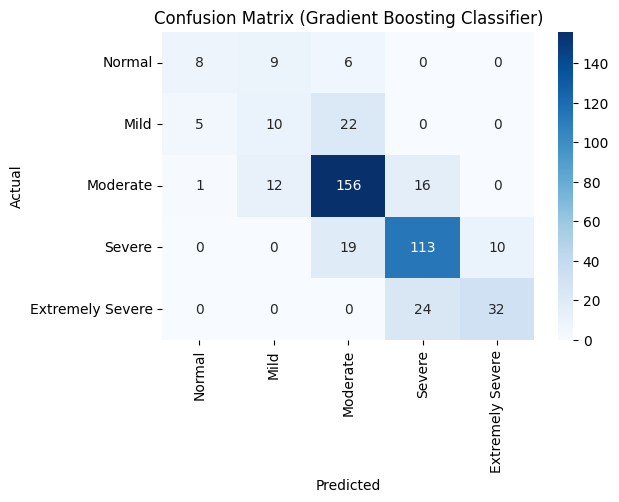

In [73]:
# Define the correct class order
class_order = ["Normal", "Mild", "Moderate", "Severe", "Extremely Severe"]

# Predict on the test set
y_pred = random_search_gb.predict(X_test)

# Print Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification Accuracy: {accuracy*100:.2f}%")

# Print Classification Report with correct class order
print("\nClassification Report:")
print(classification_report(y_test, y_pred, labels=class_order, zero_division=0))

# Compute Confusion Matrix with correct class order
cm = confusion_matrix(y_test, y_pred, labels=class_order)

# Visualize Confusion Matrix using Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_order, yticklabels=class_order)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Gradient Boosting Classifier)")
plt.show()

### **Support Vector Classifier**

#### **Setting up the SVC Hyperparameter Grid**

In [74]:
svc_param_grid = {
    'C': [0.01,0.1,0.001,1],  # Lower C values to improve generalization
    'kernel': ['rbf','sigmoid'],
    'gamma': ['scale', 0.01, 0.001]  # Avoids large gamma values that cause overfitting
}

#### **Training the Support Vector Classifier with Stratified K-Fold Cross Validation**

In [75]:
svc_model = SVC(class_weight="balanced")
grid_search_svc = GridSearchCV(estimator=svc_model, param_grid=svc_param_grid, cv=stratified_kfold, scoring='accuracy',n_jobs=1,verbose=2)
grid_search_svc.fit(X_train, y_train)

Fitting 6 folds for each of 24 candidates, totalling 144 fits
[CV] END ....................C=0.01, gamma=scale, kernel=rbf; total time=   0.5s
[CV] END ....................C=0.01, gamma=scale, kernel=rbf; total time=   0.5s
[CV] END ....................C=0.01, gamma=scale, kernel=rbf; total time=   0.5s
[CV] END ....................C=0.01, gamma=scale, kernel=rbf; total time=   0.3s
[CV] END ....................C=0.01, gamma=scale, kernel=rbf; total time=   0.3s
[CV] END ....................C=0.01, gamma=scale, kernel=rbf; total time=   0.3s
[CV] END ................C=0.01, gamma=scale, kernel=sigmoid; total time=   0.8s
[CV] END ................C=0.01, gamma=scale, kernel=sigmoid; total time=   0.9s
[CV] END ................C=0.01, gamma=scale, kernel=sigmoid; total time=   0.8s
[CV] END ................C=0.01, gamma=scale, kernel=sigmoid; total time=   0.9s
[CV] END ................C=0.01, gamma=scale, kernel=sigmoid; total time=   0.8s
[CV] END ................C=0.01, gamma=scale, k

GridSearchCV(cv=StratifiedKFold(n_splits=6, random_state=42, shuffle=True),
             estimator=SVC(class_weight='balanced'), n_jobs=1,
             param_grid={'C': [0.01, 0.1, 0.001, 1],
                         'gamma': ['scale', 0.01, 0.001],
                         'kernel': ['rbf', 'sigmoid']},
             scoring='accuracy', verbose=2)

#### **Results of performing Cross Validation**

In [76]:
print("Best Parameter:", grid_search_svc.best_params_)
print(f"Cross-Validation Accuracy: {grid_search_svc.best_score_ * 100:.2f}%")

Best Parameter: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Cross-Validation Accuracy: 85.64%


#### **Performing Prediction on unseen test data and displaying evaluation metrics**

Classification Accuracy: 83.52%

Classification Report:
                  precision    recall  f1-score   support

          Normal       0.71      0.65      0.68        23
            Mild       0.49      0.76      0.60        37
        Moderate       0.94      0.83      0.88       185
          Severe       0.87      0.89      0.88       142
Extremely Severe       0.83      0.86      0.84        56

        accuracy                           0.84       443
       macro avg       0.77      0.80      0.78       443
    weighted avg       0.86      0.84      0.84       443



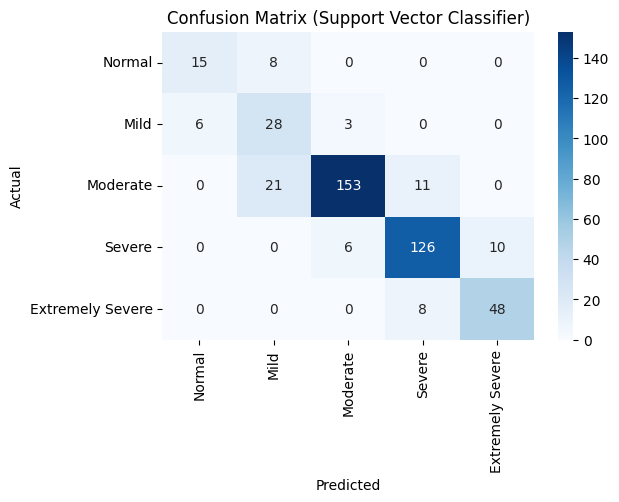

In [77]:
# Define the correct class order
class_order = ["Normal", "Mild", "Moderate", "Severe", "Extremely Severe"]

# Predict on the test set
y_pred = grid_search_svc.predict(X_test)

# Print Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification Accuracy: {accuracy*100:.2f}%")

# Print Classification Report with correct class order
print("\nClassification Report:")
print(classification_report(y_test, y_pred, labels=class_order, zero_division=0))

# Compute Confusion Matrix with correct class order
cm = confusion_matrix(y_test, y_pred, labels=class_order)

# Visualize Confusion Matrix using Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_order, yticklabels=class_order)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Support Vector Classifier)")
plt.show()

## **Saving the best Model**

In [83]:
# Define path in Google Drive
model_path = "/content/drive/My Drive/svc_model.pkl"

# Save the trained model
with open(model_path, "wb") as model_file:
    pickle.dump(grid_search_svc.best_estimator_, model_file)

print("Model saved successfully in Google Drive!")

Model saved successfully in Google Drive!


## **Creating requirements.txt for Model Deployment**

In [91]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import scipy
import sklearn

# Print versions of required libraries
print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("matplotlib:", matplotlib.__version__)
print("seaborn:", sns.__version__)
print("scipy:", scipy.__version__)
print("scikit-learn:", sklearn.__version__)

pandas: 2.2.2
numpy: 2.0.2
matplotlib: 3.10.0
seaborn: 0.13.2
scipy: 1.14.1
scikit-learn: 1.6.1


In [93]:
!touch /content/drive/MyDrive/requirements.txt

# Manually write package versions into the file
with open("/content/drive/MyDrive/requirements.txt", "w") as f:
    f.write("""pandas==2.2.2
numpy==2.0.2
matplotlib==3.10.0
seaborn==0.13.2
scipy==1.14.1
scikit-learn==1.6.1
""")

print("✅ requirements.txt saved successfully in Google Drive!")

✅ requirements.txt saved successfully in Google Drive!
